In [1]:
import pandas as pd
import numpy as np

In [2]:
data_ = pd.read_excel("hasil_prediksi\svm\seleksi/seleksi_all_fuzzy.xlsx")
latih_cm = data_['komentar'].tolist()
label_cm = data_['label'].tolist()
data_.head()

,Column1,label,komentar
0,0,spam,zuma99 com agen bandar domino bandar poket onl...
1,1,non spam,zulrobertsihombing anak bapak kayak sun
2,2,non spam,zulfikar165 makasih atas kritik masuk nya aku ...
3,3,non spam,zulaikahzakaria di depok dua gentong si genton...
4,4,non spam,zul batara tuhan mau mas beri rumah sama tanah...


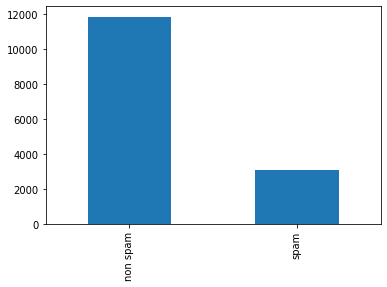

In [4]:
pd.value_counts(data_['label']).plot.bar(title='')

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump
#membuat TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix_save = tfidf.fit(latih_cm)
tfidf_matrix_ = tfidf.fit_transform(latih_cm) #For CM
print(tfidf_matrix_.shape)
X_ = tfidf_matrix_#.toarray()
Y_ = np.array(label_cm)
#y = np.array(kode)

dump(tfidf_matrix_save, 'model/svm/tfdf_model_2.joblib')

(14957, 20934)


['model/svm/tfdf_model_2.joblib']

In [7]:
#Parameter SVM
C = 1.8
gamma = 0.7

In [8]:
K = 10 #pembagian data uji dan data latih
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score #, precision_score, recall_score
kf= KFold(n_splits=K) 
skf = StratifiedKFold(n_splits=K,random_state=2, shuffle=True)
skf

StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

In [9]:
from sklearn import svm
cSVM = svm.SVC(kernel='rbf', gamma=gamma, C=C)
# comNB = ComplementNB(alpha = alpha)
# clf = GaussianNB()

akurasi_svm = []
# akurasi_cnb = []
# akurasi_gnb = []
ii = 0
for train_index, test_index in skf.split(X_, Y_):
    print(ii+1, end="")
    ii+=1
    #membagi data latih dan data uji
    X_train, X_test = X_[train_index], X_[test_index] #pembagian data latih
    y_train, y_test = Y_[train_index], Y_[test_index]
    
    #Melatih Model 
    mSVM = cSVM.fit(X_train, y_train) #SVM
#     mCNB = comNB.fit(X_train, y_train)
#     mGNB = clf.fit(X_train, y_train)
    print("p ", end="-")
    #proses prediksi
    P_SVM = mSVM.predict(X_test)
#     P_CNB = mCNB.predict(X_test)
#     P_GNB = mGNB.predict(X_test)
    
    #menyimpan hasil akurasi tiap iterasi
    akurasi_svm.append(accuracy_score(y_test, P_SVM))
#     akurasi_cnb.append(accuracy_score(y_test, P_CNB))
#     akurasi_gnb.append(accuracy_score(y_test, P_GNB))
    
rerata_akurasi_svm = sum(akurasi_svm)/len(akurasi_svm)
# rerata_akurasi_cnb = sum(akurasi_cnb)/len(akurasi_cnb)
# rerata_akurasi_gnb = sum(akurasi_gnb)/len(akurasi_gnb)


# print("----------------------------------------")
# print("Hasil K-Fold GNB")
# print("   akurasi   :",round(rerata_akurasi_gnb,2))
# print("----------------------------------------")
# print("Hasil K-Fold CNB")
# print("   akurasi   :",round(rerata_akurasi_cnb,2))
print("")
print("----------------------------------------")
print("Hasil K-Fold SVM")
print("   akurasi   :",round(rerata_akurasi_svm,2))

1p -2p -3p -4p -5p -6p -7p -8p -9p -10p -
----------------------------------------
Hasil K-Fold SVM
   akurasi   : 0.96


In [10]:
cSVM = svm.SVC(kernel='rbf', gamma=gamma, C=C)
# comNB = ComplementNB(alpha = alpha)
#Melatih Model untuk data secara keseluruhan (X dan Y)
cSVM = cSVM.fit(X_, Y_) #SVN
# comNB = comNB.fit(X_, Y_) #CNB

#save models
dump(cSVM, 'model/svm/SVM_MODEL_2.joblib')

['model/svm/SVM_MODEL_2.joblib']